In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft
import numpy as np

# Data cleaning, dealing with duplicated rows and keeping the VAERS ID first row.

In [2]:
v_data_2020 =  pd.read_csv('../data/2020VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_18960\2532601228.py:1: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2020 =  pd.read_csv('../data/2020VAERSData.csv')


In [3]:
v_vax_2020 = pd.read_csv('../data/2020VAERSVAX.csv')

In [4]:
v_symptoms_2020 = pd.read_csv('../data/2020VAERSSYMPTOMS.csv')

In [5]:
dfs = [v_data_2020, v_vax_2020,v_symptoms_2020]
vaccination_2020 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [6]:
vaccination_2020.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,855017,1/1/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,Arthralgia,22.1,Chills,22.1,Injection site pain,22.1,Pyrexia,22.1,NaN,NaN
1,855018,1/1/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,Chills,22.1,Fatigue,22.1,Hypertension,22.1,Hypoaesthesia,22.1,Injected limb mobility decreased,22.1
2,855018,1/1/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,Muscular weakness,22.1,Pain in extremity,22.1,Pyrexia,22.1,Tremor,22.1,Vertigo,22.1
3,855019,1/1/2020,NaN,50.0,50.0,NaN,F,NaN,SORENESS IN THE AREA. ITCHING AND RASH,NaN,...,Pain,22.1,Pruritus,22.1,Rash,22.1,NaN,NaN,NaN,NaN
4,855020,1/1/2020,TX,67.0,67.0,NaN,F,NaN,"sore arm, fever 101 , chills, and aching musc...",NaN,...,Chills,22.1,Influenza like illness,22.1,Myalgia,22.1,Pain in extremity,22.1,Pyrexia,22.1


In [7]:
vaccination_2020.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [8]:
vaccination_2020 = vaccination_2020.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [9]:
vaccination_2020 = vaccination_2020.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

# Need to remove unwanted columns

In [10]:
v_data_2021 = pd.read_csv('../data/2021VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_18960\344949492.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2021 = pd.read_csv('../data/2021VAERSData.csv')


In [11]:
v_vax_2021 = pd.read_csv('../data/2021VAERSVAX.csv')

In [12]:
v_symptoms_2021 = pd.read_csv('../data/2021VAERSSYMPTOMS.csv')

In [13]:
dfs = [v_data_2021, v_vax_2021,v_symptoms_2021]
vaccination_2021 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [14]:
vaccination_2021.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,1/1/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,1/1/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,1/1/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,1/1/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,1/1/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [15]:
vaccination_2021.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [16]:
vaccination_2021

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,1/1/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,1/1/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,1/1/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,1/1/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,1/1/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049875,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Dyspnoea,24.1,Echocardiogram normal,24.1,Ejection fraction normal,24.1,Facial paralysis,24.1,Feeling abnormal,24.1
1049876,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Gastrointestinal haemorrhage,24.1,Gastrostomy,24.1,Hyperlipidaemia,24.1,Hypertension,24.1,Laboratory test,24.1
1049877,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Magnetic resonance imaging head abnormal,24.1,Oesophagogastroduodenoscopy,24.1,Peripheral swelling,24.1,Type 2 diabetes mellitus,24.1,Ultrasound Doppler normal,24.1
1049878,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Urinary tract infection,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
vaccination_2021 = vaccination_2021.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [18]:
vaccination_2021 = vaccination_2021.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [19]:
v_data_2022 = pd.read_csv('../data/2022VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_18960\2420831445.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2022 = pd.read_csv('../data/2022VAERSData.csv')


In [20]:
v_vax_2022 = pd.read_csv('../data/2022VAERSVAX.csv')

In [21]:
v_symptoms_2022 = pd.read_csv('../data/2022VAERSSYMPTOMS.csv')

In [22]:
dfs = [v_data_2022, v_vax_2022,v_symptoms_2022]
vaccination_2022 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [23]:
vaccination_2022

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,1996873,1/1/2022,CA,NaN,NaN,NaN,U,NaN,This spontaneous report was received from a ph...,NaN,...,Expired product administered,24.1,No adverse event,24.1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996874,1/1/2022,NaN,NaN,NaN,NaN,U,NaN,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,NaN,...,Suspected COVID-19,24.1,Vaccination failure,24.1,NaN,NaN,NaN,NaN,NaN,NaN
2,1996875,1/1/2022,OH,NaN,NaN,NaN,M,NaN,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,NaN,...,SARS-CoV-2 test,24.1,Suspected COVID-19,24.1,Vaccination failure,24.1,NaN,NaN,NaN,NaN
3,1996876,1/1/2022,MS,34.0,NaN,NaN,F,NaN,Irregular menstrual cycle.; period extremely h...,NaN,...,Dysmenorrhoea,24.1,Heavy menstrual bleeding,24.1,Menstruation irregular,24.1,NaN,NaN,NaN,NaN
4,1996877,1/1/2022,CT,NaN,NaN,NaN,F,NaN,Breakthrough and heavy periods; longer period ...,NaN,...,Heavy menstrual bleeding,24.1,Oligomenorrhoea,24.1,SARS-CoV-2 test negative,24.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355255,2516519,11/25/2022,CA,68.0,68.0,NaN,F,NaN,Soreness in the site of injection; This sponta...,NaN,...,Vaccination site pain,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355256,2516520,11/25/2022,NaN,NaN,NaN,NaN,U,NaN,Felt far worse the next day; Arm had a big rai...,NaN,...,Feeling abnormal,25.1,Vaccination site erythema,25.1,Vaccination site mass,25.1,NaN,NaN,NaN,NaN
355257,2516521,11/25/2022,MA,74.0,74.0,NaN,F,NaN,I have tight muscles up the front of my legs; ...,NaN,...,Arthralgia,25.1,COVID-19 immunisation,25.1,Disability,25.1,Interchange of vaccine products,25.1,Muscle spasms,25.1
355258,2516521,11/25/2022,MA,74.0,74.0,NaN,F,NaN,I have tight muscles up the front of my legs; ...,NaN,...,Muscle tightness,25.1,Pain in extremity,25.1,Ultrasound scan,25.1,NaN,NaN,NaN,NaN


In [24]:
vaccination_2022.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [25]:
vaccination_2022 = vaccination_2022.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [26]:
vaccination_2022 = vaccination_2022.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [27]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,CA,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,R017624,UNK,NaN,NaN,HPV (GARDASIL 9),Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,204A21A,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,Fd8448,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,EP6955,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355254,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN
355255,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,011M20A,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN
355256,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN
355257,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,017H22A,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms


vaccination_2022_covid = vaccination_2022.loc[vaccination_2022['VAX_TYPE']=='COVID19']

vaccination_2022_covid

vaccination_2022_covid.loc[vaccination_2022_covid['DIED']== 'Y']

pd.set_option('display.max_rows', None)

#  Use VAX_Name instead of type. Need to use regex to strip the name and remove(). 

In [28]:
vaccination_2022.VAX_NAME

0                            HPV (GARDASIL 9)
1                 COVID19 (COVID19 (JANSSEN))
2                 COVID19 (COVID19 (JANSSEN))
3         COVID19 (COVID19 (PFIZER-BIONTECH))
4         COVID19 (COVID19 (PFIZER-BIONTECH))
                         ...                 
355254            COVID19 (COVID19 (JANSSEN))
355255            COVID19 (COVID19 (MODERNA))
355256            COVID19 (COVID19 (MODERNA))
355257            COVID19 (COVID19 (MODERNA))
355259            COVID19 (COVID19 (MODERNA))
Name: VAX_NAME, Length: 228433, dtype: object

In [29]:
 v_name = vaccination_2022.VAX_NAME.str.split(' \(', expand = True)

In [30]:
v_name

,0,1,2,3,4
0,HPV,GARDASIL 9),None,None,None
1,COVID19,COVID19,JANSSEN)),None,None
2,COVID19,COVID19,JANSSEN)),None,None
3,COVID19,COVID19,PFIZER-BIONTECH)),None,None
4,COVID19,COVID19,PFIZER-BIONTECH)),None,None
...,...,...,...,...,...
355254,COVID19,COVID19,JANSSEN)),None,None
355255,COVID19,COVID19,MODERNA)),None,None
355256,COVID19,COVID19,MODERNA)),None,None
355257,COVID19,COVID19,MODERNA)),None,None


In [31]:
v_name = v_name[0]

In [32]:
v_name

0             HPV
1         COVID19
2         COVID19
3         COVID19
4         COVID19
           ...   
355254    COVID19
355255    COVID19
355256    COVID19
355257    COVID19
355259    COVID19
Name: 0, Length: 228433, dtype: object

In [33]:
vaccination_2022['V_NAME']= v_name

In [34]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,1996873,CA,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,HPV (GARDASIL 9),Expired product administered,No adverse event,NaN,NaN,NaN,HPV
1,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19
2,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19
3,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19
4,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355254,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN,COVID19
355255,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN,COVID19
355256,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN,COVID19
355257,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms,COVID19


In [35]:
 v_name2 = vaccination_2021.VAX_NAME.str.split(' \(', expand = True)

In [36]:
v_name2 = v_name2[0]

In [37]:
v_name2

0                        COVID19
1                        COVID19
2                        COVID19
3                        COVID19
4                        COVID19
                   ...          
1049869                  COVID19
1049871                  COVID19
1049872                  COVID19
1049873                  COVID19
1049879    VACCINE NOT SPECIFIED
Name: 0, Length: 738352, dtype: object

In [38]:
vaccination_2021['V_NAME']= v_name2

In [39]:
vaccination_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049869,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19
1049871,1997121,OH,69.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Eczema,NaN,NaN,NaN,NaN,COVID19
1049872,1997122,NV,50.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Eye swelling,Lip swelling,Urticaria,NaN,NaN,COVID19
1049873,1998663,TN,83.0,F,Y,4/23/2021,NaN,NaN,Y,23.0,...,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Acute left ventricular failure,Angiogram cerebral normal,Anticoagulant therapy,Aortic stenosis,Arthritis,COVID19


In [40]:
 v_name3 = vaccination_2020.VAX_NAME.str.split(' \(', expand = True)

In [41]:
v_name3 = v_name3[0]

In [42]:
v_name3

0                           ZOSTER
1            VACCINE NOT SPECIFIED
3                           ZOSTER
4                           ZOSTER
5                           ZOSTER
                   ...            
73445                      COVID19
73446                      COVID19
73447                      COVID19
73448    MEASLES + MUMPS + RUBELLA
73451                      COVID19
Name: 0, Length: 49634, dtype: object

In [43]:
vaccination_2020['V_NAME'] = v_name3

In [44]:
vaccination_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,855017,HI,55.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,ZOSTER (SHINGRIX),Arthralgia,Chills,Injection site pain,Pyrexia,NaN,ZOSTER
1,855018,WI,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased,VACCINE NOT SPECIFIED
3,855019,NaN,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,ZOSTER (SHINGRIX),Pain,Pruritus,Rash,NaN,NaN,ZOSTER
4,855020,TX,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,ZOSTER (SHINGRIX),Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,ZOSTER
5,855021,NaN,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,IM,RA,ZOSTER (SHINGRIX),Chills,Dizziness,Nausea,Palpitations,NaN,ZOSTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73445,918441,NE,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Injection site pain,Injection site swelling,Injection site warmth,NaN,NaN,COVID19
73446,918442,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Arthralgia,Dysgeusia,Injection site pain,Injection site swelling,Paraesthesia,COVID19
73447,918503,RI,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Chest discomfort,Nausea,NaN,NaN,NaN,COVID19
73448,918512,OR,1.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SC,LL,MEASLES + MUMPS + RUBELLA (MMR II),Injection site induration,Urticaria,NaN,NaN,NaN,MEASLES + MUMPS + RUBELLA


# Getting Covid vaccination data from all 3 years: 2020,2021,2022

In [45]:
vaccination_2020 = vaccination_2020.loc[vaccination_2020['V_NAME']=='COVID19']

In [46]:
vaccination_2020.reset_index(inplace =True, drop = True)

In [47]:
vaccination_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,902418,NJ,56.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Hypoaesthesia,Injection site hypoaesthesia,NaN,NaN,NaN,COVID19
1,902440,AZ,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,NaN,NaN,NaN,NaN,COVID19
2,902446,WV,55.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Erythema,Feeling hot,Flushing,NaN,NaN,COVID19
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19
4,902465,AR,60.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysgeusia,Oral pruritus,Paraesthesia,Paraesthesia oral,Parosmia,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10377,918440,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Dysgeusia,Myalgia,Pain,Painful respiration,NaN,COVID19
10378,918441,NE,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Injection site pain,Injection site swelling,Injection site warmth,NaN,NaN,COVID19
10379,918442,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Arthralgia,Dysgeusia,Injection site pain,Injection site swelling,Paraesthesia,COVID19
10380,918503,RI,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Chest discomfort,Nausea,NaN,NaN,NaN,COVID19


In [48]:
vaccination_2021 = vaccination_2021.loc[vaccination_2021['V_NAME']=='COVID19']

In [49]:
vaccination_2021.reset_index(inplace =True, drop = True)

In [50]:
vaccination_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696207,1997119,SC,27.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,LA,COVID19 (COVID19 (MODERNA)),Dermatitis,Erythema,Mechanical urticaria,Pruritus,Urticaria,COVID19
696208,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19
696209,1997121,OH,69.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Eczema,NaN,NaN,NaN,NaN,COVID19
696210,1997122,NV,50.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Eye swelling,Lip swelling,Urticaria,NaN,NaN,COVID19


In [51]:
vaccination_2022 = vaccination_2022.loc[vaccination_2022['V_NAME']=='COVID19']

In [52]:
vaccination_2022.reset_index(inplace =True, drop = True)

In [53]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19
1,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19
2,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19
3,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19
4,1996878,NaN,74.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Chills,Fatigue,Immunisation,Pain,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196703,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN,COVID19
196704,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN,COVID19
196705,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN,COVID19
196706,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms,COVID19


In [54]:
vaccination_2020.STATE.value_counts()

CA    969
TX    699
NY    522
IL    483
FL    426
PA    348
OH    291
CO    273
NJ    271
MI    257
MO    246
MA    245
AZ    210
WA    208
NC    200
VA    195
TN    182
AR    179
IN    176
GA    170
OK    154
MN    151
KS    150
WI    149
MT    144
MD    135
CT    124
IA    124
OR    113
ME    113
AK    110
PR    108
AL    107
KY    105
NE    100
NM     94
LA     90
WV     82
NV     81
ID     81
SD     74
HI     68
UT     65
SC     56
ND     53
MS     51
NH     45
RI     42
VT     32
WY     15
DC     13
DE     12
GU      2
AS      2
Name: STATE, dtype: int64

# Putting On a mask on The Df for getting patient outcomes

In [55]:
severe_2020 = vaccination_2020.loc[((vaccination_2020['DIED'] =='Y') | (vaccination_2020['L_THREAT'] =='Y')|(vaccination_2020['ER_VISIT']=='Y')|(vaccination_2020['HOSPITAL']=='Y')|(vaccination_2020['X_STAY']=='Y')|(vaccination_2020['DISABLE']=='Y')|(vaccination_2020['ER_ED_VISIT']=='Y')|(vaccination_2020['OFC_VISIT']=='Y'))]

In [56]:
severe_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19
5,902468,NaN,59.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness,COVID19
6,902479,KS,46.0,F,NaN,NaN,NaN,NaN,Y,1.0,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest pain,Feeling abnormal,Flushing,Intensive care,NaN,COVID19
8,902491,NE,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Dyspnoea,Erythema,Headache,COVID19
9,902492,AR,44.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Feeling hot,Nausea,Visual impairment,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,916587,MD,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SC,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,Headache,Injection site erythema,Injection site pain,Injection site pruritus,COVID19
10359,916594,FL,91.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Gait inability,Hemiparesis,NaN,NaN,NaN,COVID19
10363,918247,FL,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Injection site pain,Musculoskeletal stiffness,Nail discolouration,Nausea,NaN,COVID19
10364,918249,TX,45.0,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SC,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Pruritus,Rash,SARS-CoV-2 antibody test,Urticaria,NaN,COVID19


In [57]:
severe_2021 = vaccination_2021.loc[((vaccination_2021['DIED'] =='Y') | (vaccination_2021['L_THREAT'] =='Y')|(vaccination_2021['ER_VISIT']=='Y')|(vaccination_2021['HOSPITAL']=='Y')|(vaccination_2021['X_STAY']=='Y')|(vaccination_2021['DISABLE']=='Y')|(vaccination_2021['ER_ED_VISIT']=='Y')|(vaccination_2021['OFC_VISIT']=='Y'))]

In [58]:
severe_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
10,916611,NC,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,RA,COVID19 (COVID19 (MODERNA)),Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,COVID19
13,916614,NY,29.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Blood pressure increased,Chest discomfort,Heart rate increased,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696199,1996862,KS,24.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,SYR,LA,COVID19 (COVID19 (MODERNA)),Rash,NaN,NaN,NaN,NaN,COVID19
696202,1996867,PA,83.0,F,Y,5/2/2021,Y,NaN,Y,23.0,...,2,SYR,RA,COVID19 (COVID19 (MODERNA)),Back pain,Blood pressure abnormal,Bone scan,Bursitis,Cardiac arrest,COVID19
696205,1997117,PA,18.0,F,NaN,NaN,Y,NaN,NaN,NaN,...,UNK,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Urticaria,NaN,NaN,NaN,NaN,COVID19
696208,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19


In [59]:
severe_2022 = vaccination_2022.loc[((vaccination_2022['DIED'] =='Y') | (vaccination_2022['L_THREAT'] =='Y')|(vaccination_2022['ER_VISIT']=='Y')|(vaccination_2022['HOSPITAL']=='Y')|(vaccination_2022['X_STAY']=='Y')|(vaccination_2022['DISABLE']=='Y')|(vaccination_2022['ER_ED_VISIT']=='Y')|(vaccination_2022['OFC_VISIT']=='Y'))]

In [60]:
severe_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
5,1996879,DE,78.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Diarrhoea,SARS-CoV-2 test,NaN,NaN,NaN,COVID19
7,1996881,NY,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,2,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Biopsy,Biopsy skin,Drug eruption,Rash,NaN,COVID19
15,1996889,NaN,30.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Immunisation,Lymphadenopathy,Mobility decreased,Pain,NaN,COVID19
25,1996899,NaN,40.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Headache,Immunisation,Paranasal sinus discomfort,SARS-CoV-2 test,COVID19
40,1996915,CA,76.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,Migraine,Tinnitus,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,4,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19


In [61]:
severe_2021.DIED.value_counts()

Y    9778
Name: DIED, dtype: int64

In [62]:
severe_2021.L_THREAT.value_counts()

Y    10702
Name: L_THREAT, dtype: int64

In [63]:
severe_2021.STATE.value_counts()

CA    21950
FL    12045
NY    11794
TX    11548
PA     8899
      ...  
FM        3
XV        2
XL        1
Tx        1
QM        1
Name: STATE, Length: 63, dtype: int64

# Read the DF for year 2018 and 2017, already have DF for year 2019.Extract Influenza from it and take a deep dive.



In [64]:
v_data_2019 = pd.read_csv('../data/2019VAERSData.csv')


In [65]:
v_vax_2019 = pd.read_csv('../data/2019VAERSVAX.csv')

In [66]:
v_symptoms_2019 = pd.read_csv('../data/2019VAERSSYMPTOMS.csv')

In [67]:
dfs = [v_data_2019, v_vax_2019,v_symptoms_2019]
vaccination_2019 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)


In [68]:
vaccination_2019.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [69]:
vaccination_2019

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,794156,1/1/2019,NaN,69.0,69.0,NaN,F,NaN,"Severe pain Lt. shoulder area, very localized ...",NaN,...,Injected limb mobility decreased,21.1,Injection site joint pain,21.1,NaN,NaN,NaN,NaN,NaN,NaN
1,794157,1/1/2019,IL,68.0,68.0,NaN,F,NaN,"Much joint pain/aching, lack of energy, listle...",NaN,...,Apathy,21.1,Arthralgia,21.1,Asthenia,21.1,Injection site erythema,21.1,Injection site pain,21.1
2,794157,1/1/2019,IL,68.0,68.0,NaN,F,NaN,"Much joint pain/aching, lack of energy, listle...",NaN,...,Injection site pruritus,21.1,Injection site swelling,21.1,Injection site warmth,21.1,Listless,21.1,Night sweats,21.1
3,794158,1/1/2019,MA,62.0,62.0,NaN,F,NaN,"Headache, Fever, Chills, Body Aches, Nausea la...",NaN,...,Chills,21.1,Headache,21.1,Nausea,21.1,Pain,21.1,Pyrexia,21.1
4,794159,1/1/2019,UT,5.0,5.0,NaN,M,NaN,"Site is swollen, red and warm to the touch. Pa...",NaN,...,Injection site erythema,21.1,Injection site swelling,21.1,Injection site warmth,21.1,Pain,21.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76735,855016,12/31/2019,WA,65.0,65.0,NaN,M,NaN,Continuous pain in arm (muscle). Patient repor...,NaN,...,Myalgia,22.1,Pain in extremity,22.1,NaN,NaN,NaN,NaN,NaN,NaN
76736,855111,12/31/2019,LA,60.0,NaN,NaN,U,NaN,patient experiencing pain in shoulder - hurts ...,NaN,...,Musculoskeletal pain,22.1,Pain,22.1,Tenderness,22.1,NaN,NaN,NaN,NaN
76737,855112,12/31/2019,OH,68.0,68.0,NaN,F,NaN,"Pt experiencing pain in arm, shoulder + neck s...",NaN,...,Immediate post-injection reaction,22.1,Injection site pain,22.1,Neck pain,22.1,Pain in extremity,22.1,NaN,NaN
76738,855112,12/31/2019,OH,68.0,68.0,NaN,F,NaN,"Pt experiencing pain in arm, shoulder + neck s...",NaN,...,Immediate post-injection reaction,22.1,Injection site pain,22.1,Neck pain,22.1,Pain in extremity,22.1,NaN,NaN


In [70]:
vaccination_2019 = vaccination_2019.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [71]:
vaccination_2019.VAX_NAME

0        INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT)
1                                  ZOSTER (SHINGRIX)
3                                  ZOSTER (SHINGRIX)
4                                DTAP + IPV (KINRIX)
6                                  ZOSTER (SHINGRIX)
                            ...                     
76734                        HEP A + HEP B (TWINRIX)
76735                              ZOSTER (SHINGRIX)
76736    INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT)
76737       INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE)
76739       INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE)
Name: VAX_NAME, Length: 48435, dtype: object

In [72]:
v_data_2018 = pd.read_csv('../data/2018VAERSData.csv')


In [73]:
v_vax_2018 = pd.read_csv('../data/2018VAERSVAX.csv')

In [74]:
v_symptoms_2018 = pd.read_csv('../data/2018VAERSSYMPTOMS.csv')

In [75]:
dfs = [v_data_2018, v_vax_2018,v_symptoms_2018]
vaccination_2018 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [76]:
vaccination_2018 = vaccination_2018.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [77]:
v_data_2017 = pd.read_csv('../data/2017VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_18960\1506982840.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2017 = pd.read_csv('../data/2017VAERSData.csv')


In [78]:
v_vax_2017 = pd.read_csv('../data/2017VAERSVAX.csv')

In [79]:
v_symptoms_2017 = pd.read_csv('../data/2017VAERSSYMPTOMS.csv')

In [80]:
dfs = [v_data_2017, v_vax_2017,v_symptoms_2017]
vaccination_2017 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [81]:
vaccination_2017 = vaccination_2017.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [82]:
vaccination_2019 = vaccination_2019.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [83]:
vaccination_2018 = vaccination_2018.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [84]:
vaccination_2017 = vaccination_2017.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [85]:
vaccination_2017.VAX_NAME

0                                       HEP A (VAQTA)
3                                  PNEUMO (PNEUMOVAX)
4                     INFLUENZA (SEASONAL) (FLUVIRIN)
9                                  PNEUMO (PNEUMOVAX)
10        INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
                             ...                     
62830                              PNEUMO (PNEUMOVAX)
62831                                 TDAP (BOOSTRIX)
62832    INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)
62833                          PNEUMO (NO BRAND NAME)
62834                              PNEUMO (PNEUMOVAX)
Name: VAX_NAME, Length: 38910, dtype: object

In [86]:
v_name4 = vaccination_2017.VAX_NAME.str.split(' \(', expand = True)

In [87]:
v_name4 = v_name4[0]

In [88]:
v_name4

0            HEP A
3           PNEUMO
4        INFLUENZA
9           PNEUMO
10       INFLUENZA
           ...    
62830       PNEUMO
62831         TDAP
62832    INFLUENZA
62833       PNEUMO
62834       PNEUMO
Name: 0, Length: 38910, dtype: object

In [89]:
vaccination_2017['V_NAME'] = v_name4

In [90]:
vaccination_2017 = vaccination_2017.loc[vaccination_2017['V_NAME']=='INFLUENZA']

In [91]:
vaccination_2017.reset_index(inplace =True, drop = True)

In [92]:
vaccination_2017

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,676019,OH,53.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,7+,IM,RA,INFLUENZA (SEASONAL) (FLUVIRIN),Injection site reaction,Musculoskeletal stiffness,Pain,NaN,NaN,INFLUENZA
1,676021,TX,58.00,M,NaN,NaN,NaN,Y,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Pruritus,Rash generalised,NaN,NaN,NaN,INFLUENZA
2,676022,OK,35.00,F,NaN,NaN,Y,NaN,Y,5.0,...,2,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Paraesthesia,NaN,NaN,NaN,NaN,INFLUENZA
3,676028,MI,9.00,F,NaN,NaN,NaN,Y,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Abdominal pain,Fatigue,Flushing,Gait disturbance,Nausea,INFLUENZA
4,676029,TX,67.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,IM,LA,INFLUENZA (SEASONAL) (NO BRAND NAME),Injection site pain,Pain,NaN,NaN,NaN,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10514,732208,IA,31.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,4,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Pruritus,Urticaria,Vaccination complication,NaN,NaN,INFLUENZA
10515,732209,WI,66.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Acne,Burning sensation,Dry skin,Eye irritation,Lacrimation increased,INFLUENZA
10516,732214,OH,33.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Injected limb mobility decreased,Injection site joint movement impairment,Loss of personal independence in daily activities,Musculoskeletal pain,X-ray limb,INFLUENZA
10517,732215,CT,66.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SYR,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Chills,Decreased appetite,Gastrointestinal sounds abnormal,Headache,Nervousness,INFLUENZA


In [93]:
v_name5 = vaccination_2018.VAX_NAME.str.split(' \(', expand = True)

In [94]:
v_name5 = v_name5[0]

In [95]:
v_name5

0        VACCINE NOT SPECIFIED
1             DTAP + IPV + HIB
4                       ZOSTER
5                    INFLUENZA
6                      ANTHRAX
                 ...          
76924                INFLUENZA
76925                   ZOSTER
76927        DTAP + HEPB + IPV
76931                     DTAP
76935                INFLUENZA
Name: 0, Length: 49134, dtype: object

In [96]:
vaccination_2018['V_NAME'] = v_name5

In [97]:
vaccination_2018 = vaccination_2018.loc[vaccination_2018['V_NAME']=='INFLUENZA']

In [98]:
vaccination_2018.reset_index(inplace =True, drop = True)

In [99]:
vaccination_2018

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,732220,NJ,80.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Rash,Skin warm,NaN,NaN,NaN,INFLUENZA
1,732223,NC,65.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,RA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Erythema,Pruritus,NaN,NaN,NaN,INFLUENZA
2,732229,WA,74.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Musculoskeletal stiffness,Pain in extremity,NaN,NaN,NaN,INFLUENZA
3,732230,AZ,33.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,RA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Drug administered at inappropriate site,Injected limb mobility decreased,Injection site pain,Pain,NaN,INFLUENZA
4,732231,MI,38.00,F,NaN,NaN,Y,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Dizziness,Facial paralysis,Headache,Herpes zoster,Herpes zoster oticus,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,794140,MA,0.67,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LL,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT),Urticaria,NaN,NaN,NaN,NaN,INFLUENZA
11396,794148,NV,54.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SYR,AR,INFLUENZA (SEASONAL) (NO BRAND NAME),Pain,Product administered at inappropriate site,X-ray limb,NaN,NaN,INFLUENZA
11397,794149,PA,30.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Malaise,Vomiting,NaN,NaN,NaN,INFLUENZA
11398,794154,NC,45.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Blood pressure decreased,Fear of injection,Heart rate decreased,Syncope,NaN,INFLUENZA


In [100]:
v_name6 = vaccination_2019.VAX_NAME.str.split(' \(', expand = True)

In [101]:
v_name6 = v_name6[0]

In [102]:
v_name6

0            INFLUENZA
1               ZOSTER
3               ZOSTER
4           DTAP + IPV
6               ZOSTER
             ...      
76734    HEP A + HEP B
76735           ZOSTER
76736        INFLUENZA
76737        INFLUENZA
76739        INFLUENZA
Name: 0, Length: 48435, dtype: object

In [103]:
vaccination_2019['V_NAME'] = v_name6

In [104]:
vaccination_2019 = vaccination_2019.loc[vaccination_2019['V_NAME']=='INFLUENZA']

In [105]:
vaccination_2019.reset_index(inplace =True, drop = True)

In [106]:
vaccination_2019

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,794156,NaN,69.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Injected limb mobility decreased,Injection site joint pain,NaN,NaN,NaN,INFLUENZA
1,794165,TX,80.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Extra dose administered,No adverse event,NaN,NaN,NaN,INFLUENZA
2,794166,MD,36.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,LA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Bursitis,Injection site reaction,NaN,NaN,NaN,INFLUENZA
3,794168,MA,43.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,UN,UN,INFLUENZA (SEASONAL) (NO BRAND NAME),Dizziness,Ear pain,Labyrinthitis,Migraine,Nausea,INFLUENZA
4,794178,NaN,24.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,NaN,INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT),Biopsy skin,Eczema,Full blood count normal,Generalised vaccinia,HIV test negative,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,855008,NE,9.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Injection site erythema,Injection site swelling,NaN,NaN,NaN,INFLUENZA
9883,855013,CO,91.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Rash pruritic,Renal function test normal,NaN,NaN,NaN,INFLUENZA
9884,855111,LA,60.0,U,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT),Musculoskeletal pain,Pain,Tenderness,NaN,NaN,INFLUENZA
9885,855112,OH,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Immediate post-injection reaction,Injection site pain,Neck pain,Pain in extremity,NaN,INFLUENZA


# Getting influenza severe symptoms Df.

In [107]:
severe_2017 = vaccination_2017.loc[((vaccination_2017['DIED'] =='Y') | (vaccination_2017['L_THREAT'] =='Y')|(vaccination_2017['ER_VISIT']=='Y')|(vaccination_2017['HOSPITAL']=='Y')|(vaccination_2017['X_STAY']=='Y')|(vaccination_2017['DISABLE']=='Y')|(vaccination_2017['ER_ED_VISIT']=='Y')|(vaccination_2017['OFC_VISIT']=='Y'))]

In [108]:
severe_2017

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
1,676021,TX,58.00,M,NaN,NaN,NaN,Y,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Pruritus,Rash generalised,NaN,NaN,NaN,INFLUENZA
2,676022,OK,35.00,F,NaN,NaN,Y,NaN,Y,5.0,...,2,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Paraesthesia,NaN,NaN,NaN,NaN,INFLUENZA
3,676028,MI,9.00,F,NaN,NaN,NaN,Y,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Abdominal pain,Fatigue,Flushing,Gait disturbance,Nausea,INFLUENZA
5,676056,MA,21.00,M,NaN,NaN,NaN,Y,NaN,NaN,...,7+,IM,RA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Albumin CSF,Anion gap,Back pain,Basophil count normal,Basophil percentage,INFLUENZA
10,676066,FL,33.00,F,NaN,NaN,NaN,Y,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Infection,Injection site erythema,Vaccination site bruising,Vaccination site induration,Vaccination site pain,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10510,732200,WI,76.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Mobility decreased,Musculoskeletal stiffness,Pain in extremity,NaN,NaN,INFLUENZA
10511,732201,TX,56.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Contusion,Pain,Swelling,NaN,NaN,INFLUENZA
10512,732204,NC,51.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SYR,RA,INFLUENZA (SEASONAL) (FLUBLOK),Mycobacterium tuberculosis complex test,NaN,NaN,NaN,NaN,INFLUENZA
10516,732214,OH,33.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Injected limb mobility decreased,Injection site joint movement impairment,Loss of personal independence in daily activities,Musculoskeletal pain,X-ray limb,INFLUENZA


In [109]:
severe_2018 = vaccination_2018.loc[((vaccination_2018['DIED'] =='Y') | (vaccination_2018['L_THREAT'] =='Y')|(vaccination_2018['ER_VISIT']=='Y')|(vaccination_2018['HOSPITAL']=='Y')|(vaccination_2018['X_STAY']=='Y')|(vaccination_2018['DISABLE']=='Y')|(vaccination_2018['ER_ED_VISIT']=='Y')|(vaccination_2018['OFC_VISIT']=='Y'))]

In [110]:
severe_2018

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
4,732231,MI,38.0,F,NaN,NaN,Y,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Dizziness,Facial paralysis,Headache,Herpes zoster,Herpes zoster oticus,INFLUENZA
5,732253,NY,10.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Urticaria,NaN,NaN,NaN,NaN,INFLUENZA
6,732263,MD,51.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SYR,RA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Burning sensation,Initial insomnia,Injected limb mobility decreased,Loss of personal independence in daily activities,Pain in extremity,INFLUENZA
7,732269,NM,13.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT),Hypoaesthesia,Paraesthesia,NaN,NaN,NaN,INFLUENZA
8,732270,NJ,36.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,LA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Crepitations,Injection site pain,Pain,NaN,NaN,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11386,794024,NJ,31.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,UN,LA,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),Pain,Tinnitus,NaN,NaN,NaN,INFLUENZA
11388,794059,WI,42.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Disturbance in attention,Fatigue,Gait disturbance,Hypoaesthesia,Muscular weakness,INFLUENZA
11394,794121,CA,36.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,IM,OT,INFLUENZA (SEASONAL) (FLUBLOK QUADRIVALENT),Injection site erythema,Injection site swelling,Injection site warmth,NaN,NaN,INFLUENZA
11396,794148,NV,54.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SYR,AR,INFLUENZA (SEASONAL) (NO BRAND NAME),Pain,Product administered at inappropriate site,X-ray limb,NaN,NaN,INFLUENZA


In [111]:
severe_2019 = vaccination_2019.loc[((vaccination_2019['DIED'] =='Y') | (vaccination_2019['L_THREAT'] =='Y')|(vaccination_2019['ER_VISIT']=='Y')|(vaccination_2019['HOSPITAL']=='Y')|(vaccination_2019['X_STAY']=='Y')|(vaccination_2019['DISABLE']=='Y')|(vaccination_2019['ER_ED_VISIT']=='Y')|(vaccination_2019['OFC_VISIT']=='Y'))]

In [112]:
severe_2019

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,794156,NaN,69.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Injected limb mobility decreased,Injection site joint pain,NaN,NaN,NaN,INFLUENZA
2,794166,MD,36.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,LA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Bursitis,Injection site reaction,NaN,NaN,NaN,INFLUENZA
3,794168,MA,43.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,UN,UN,INFLUENZA (SEASONAL) (NO BRAND NAME),Dizziness,Ear pain,Labyrinthitis,Migraine,Nausea,INFLUENZA
4,794178,NaN,24.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IM,NaN,INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT),Biopsy skin,Eczema,Full blood count normal,Generalised vaccinia,HIV test negative,INFLUENZA
6,794195,NJ,4.0,M,NaN,NaN,NaN,NaN,Y,NaN,...,UNK,UN,UN,INFLUENZA (SEASONAL) (NO BRAND NAME),Abdominal X-ray,Abdominal pain,Adhesiolysis,Ascites,Blood culture negative,INFLUENZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,854981,WI,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT),Erythema,Inflammation,Magnetic resonance imaging abnormal,Skin warm,Swelling,INFLUENZA
9880,854996,AL,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT),Discomfort,Pain,NaN,NaN,NaN,INFLUENZA
9881,855004,CA,72.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Bursitis,Headache,Pyrexia,Vision blurred,NaN,INFLUENZA
9883,855013,CO,91.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),Rash pruritic,Renal function test normal,NaN,NaN,NaN,INFLUENZA


In [113]:
severe_2019.AGE_YRS.value_counts()

66.00    107
65.00    101
72.00     86
67.00     78
70.00     77
        ... 
98.00      1
2.25       1
0.08       1
0.42       1
95.00      1
Name: AGE_YRS, Length: 125, dtype: int64

In [114]:
severe_2019[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT
Y,44,70,101,418,5,192,1118,2760


In [115]:
severe_2018[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT
Y,46,95,224,448,3,208,1283,3112


In [116]:
severe_2017[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT
Y,21,118,978,394,5,188,818,2612


In [117]:
outcome_1 = severe_2020[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)
outcome_1

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT
Y,16,65,18,139,2,10,1841,1375


In [118]:
outcome_1 ['ER_COMBINE'] = (outcome_1['ER_VISIT'] + outcome_1['ER_ED_VISIT'])
outcome_1

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT,ER_COMBINE
Y,16,65,18,139,2,10,1841,1375,1859


In [119]:
outcome_2 = severe_2021[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)

In [120]:
outcome_2['ER_COMBINE'] = (outcome_2['ER_VISIT'] + outcome_2['ER_ED_VISIT'])
outcome_2

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT,ER_COMBINE
Y,9778,10702,93,45813,349,10966,83998,134105,84091


In [121]:
outcome_3 = severe_2022[['DIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'X_STAY', 'DISABLE','ER_ED_VISIT','OFC_VISIT']].apply(pd.value_counts)

In [122]:
outcome_3['ER_COMBINE'] = (outcome_3['ER_VISIT'] + outcome_3['ER_ED_VISIT'])
outcome_3

,DIED,L_THREAT,ER_VISIT,HOSPITAL,X_STAY,DISABLE,ER_ED_VISIT,OFC_VISIT,ER_COMBINE
Y,5714,2788,13,26155,105,4528,21135,41570,21148


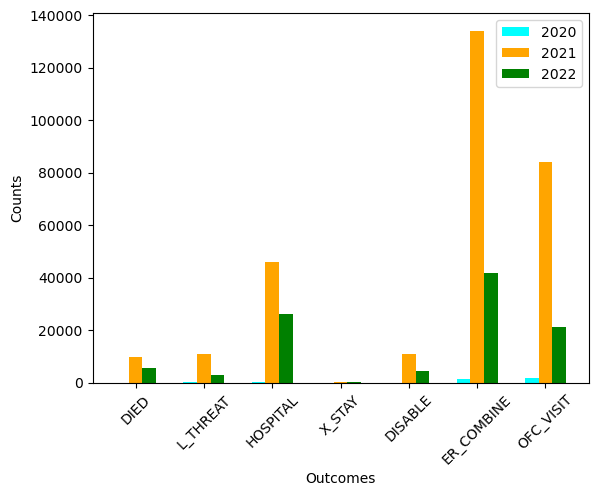

In [123]:

  
# create data
x = np.arange(7)
y1 = [16,65,139,2,10,1357,1859]
y2 = [9778,10702,45813,349,10966,134105,84091]
y3 = [5714,2788,26155,105,4528,41570,21148]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE','ER_COMBINE','OFC_VISIT'])
plt.xlabel("Outcomes")
plt.ylabel("Counts")
plt.legend(["2020", "2021", "2022"])
plt.xticks(rotation = 45)
plt.show()

In [124]:
severe_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
5,1996879,DE,78.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Diarrhoea,SARS-CoV-2 test,NaN,NaN,NaN,COVID19
7,1996881,NY,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,2,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Biopsy,Biopsy skin,Drug eruption,Rash,NaN,COVID19
15,1996889,NaN,30.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Immunisation,Lymphadenopathy,Mobility decreased,Pain,NaN,COVID19
25,1996899,NaN,40.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Headache,Immunisation,Paranasal sinus discomfort,SARS-CoV-2 test,COVID19
40,1996915,CA,76.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,Migraine,Tinnitus,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,4,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19


In [125]:
severe_combine = pd.concat([severe_2020, severe_2021, severe_2022], axis = 0)

In [126]:
severe_combine.STATE.value_counts()

CA    27912
MI    15646
FL    15598
TX    15299
NY    15001
      ...  
FM        3
XV        2
XL        1
Tx        1
QM        1
Name: STATE, Length: 63, dtype: int64

In [127]:
covid_states_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_18960\3205005835.py:1: DtypeWarning: Columns (4,5,6,7,8,10,11,13,15,16,18,19,22,25,26,28,32,34,38,40,42,44,46,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,75,77,79,81,83,84,85,86,87,88,90,92,93,94,95,96,97,98,99,100,101,103,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_states_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')


In [128]:
covid_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37080 entries, 0 to 37079
Columns: 109 entries, Date to Bivalent_Booster_65Plus_Pop_Pct
dtypes: float64(22), int64(1), object(86)
memory usage: 30.8+ MB


In [129]:
covid_states_df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Novavax',
       'Distributed_Unk_Manuf', 'Dist_Per_100K',
       ...
       'Dist_Bivalent_PFR', 'Dist_Bivalent_MOD', 'Bivalent_Booster_5Plus',
       'Bivalent_Booster_5Plus_Pop_Pct', 'Bivalent_Booster_12Plus',
       'Bivalent_Booster_12Plus_Pop_Pct', 'Bivalent_Booster_18Plus',
       'Bivalent_Booster_18Plus_Pop_Pct', 'Bivalent_Booster_65Plus',
       'Bivalent_Booster_65Plus_Pop_Pct'],
      dtype='object', length=109)

In [130]:
covid_states_manu = covid_states_df.loc[:,['Date','Location','Administered','Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Novavax','Administered_Unk_Manuf','Admin_Per_100K','Admin_Per_100k_5Plus','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']]

In [131]:
latest_data = covid_states_manu.loc[covid_states_manu['Date']=='12/07/2022']

In [132]:
latest_data

,Date,Location,Administered,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus
0,12/07/2022,OH,"20,509,252","636,139","7,710,019","12,138,606","1,617","22,871","175,456","185,420","197,811","205,680","315,859"
1,12/07/2022,IA,"5,950,297","180,684","2,310,831","3,456,371",523,"1,888","188,595","199,955","214,134","222,855","352,127"
2,12/07/2022,VI,"153,128","2,351","46,947","103,823",7,0,"144,066","153,582","168,142","175,564","220,036"
3,12/07/2022,TN,"11,104,577","270,409","4,240,932","6,514,060","1,508","77,668","162,605","172,422","185,431","193,739","301,869"
4,12/07/2022,ND,"1,276,889","40,009","453,781","782,613",157,329,"167,557","179,137","191,869","198,718","313,526"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,12/07/2022,MI,"18,228,295","472,409","7,158,196","10,592,877","1,226","3,587","182,523","192,955","204,984","212,683","320,801"
60,12/07/2022,SD,"1,645,763","42,483","623,943","979,169",57,111,"186,034","198,799","213,546","221,626","340,052"
61,12/07/2022,IL,"26,117,630","687,480","9,233,184","16,159,526","2,056","35,384","206,108","217,574","229,433","235,604","329,454"
62,12/07/2022,DE,"2,023,149","63,013","774,940","1,182,475",103,"2,618","207,766","219,280","232,507","238,209","343,451"


In [133]:
total = latest_data[['Location', 'Administered']]

In [134]:
total

,Location,Administered
0,OH,"20,509,252"
1,IA,"5,950,297"
2,VI,"153,128"
3,TN,"11,104,577"
4,ND,"1,276,889"
...,...,...
59,MI,"18,228,295"
60,SD,"1,645,763"
61,IL,"26,117,630"
62,DE,"2,023,149"


In [135]:
severe_combine.columns

Index(['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME'],
      dtype='object')

In [136]:
severe_combine.STATE.value_counts()

CA    27912
MI    15646
FL    15598
TX    15299
NY    15001
      ...  
FM        3
XV        2
XL        1
Tx        1
QM        1
Name: STATE, Length: 63, dtype: int64

In [137]:
grp = severe_combine.groupby('STATE')

In [138]:
statewise = grp.count()

In [139]:
statewise.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME'],
      dtype='object')

In [140]:
statewise = statewise.loc[:,['VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'OFC_VISIT', 'ER_ED_VISIT']]

In [141]:
statewise.reset_index(inplace = True, drop = False)

In [142]:
statewise

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,AK,871,35,37,80,67,3,30,558,340
1,AL,2234,91,157,349,269,2,155,1488,835
2,AR,2155,110,98,724,408,1,107,1141,585
3,AS,28,1,3,7,4,0,2,17,11
4,AZ,5326,127,327,770,626,11,424,3718,1951
...,...,...,...,...,...,...,...,...,...,...
58,WV,1246,70,67,348,283,3,74,676,439
59,WY,437,24,19,60,46,0,21,294,164
60,XB,6,1,1,2,2,0,1,3,5
61,XL,1,0,1,1,1,0,0,1,0


In [143]:
main_count= pd.merge(statewise,total, left_on = 'STATE',right_on ='Location',how = 'inner')

In [144]:
main_count = main_count.drop('Location',axis=1)

In [145]:
main_count.nsmallest(10,'VAERS_ID')

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
11,FM,3,0,0,2,1,0,1,1,0,"191,709"
25,MH,5,0,0,1,1,0,1,2,2,"92,665"
29,MP,25,11,2,5,4,0,0,6,7,"114,967"
3,AS,28,1,3,7,4,0,2,17,11,"114,852"
52,VI,50,0,1,4,4,0,3,40,17,"153,128"
13,GU,99,4,11,9,5,0,3,80,26,"388,371"
57,WY,437,24,19,60,46,0,21,294,164,"836,023"
8,DC,712,18,36,89,70,0,42,513,216,"1,909,510"
33,ND,743,41,29,303,267,0,27,339,271,"1,276,889"
53,VT,764,14,38,79,59,1,38,534,296,"1,697,824"


In [146]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,871,35,37,80,67,3,30,558,340,"1,295,275"
1,AL,2234,91,157,349,269,2,155,1488,835,"6,888,090"
2,AR,2155,110,98,724,408,1,107,1141,585,"4,768,177"
3,AS,28,1,3,7,4,0,2,17,11,"114,852"
4,AZ,5326,127,327,770,626,11,424,3718,1951,"14,161,294"
5,CA,27912,648,1308,3614,2756,33,1843,19110,10465,"85,662,449"
6,CO,5718,121,311,1009,768,7,342,3729,2165,"12,682,240"
7,CT,3430,70,149,493,368,4,217,2367,1287,"8,801,850"
8,DC,712,18,36,89,70,0,42,513,216,"1,909,510"
9,DE,815,25,48,146,108,1,46,545,296,"2,023,149"


In [147]:
main_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         58 non-null     object
 1   VAERS_ID      58 non-null     int64 
 2   DIED          58 non-null     int64 
 3   L_THREAT      58 non-null     int64 
 4   HOSPITAL      58 non-null     int64 
 5   HOSPDAYS      58 non-null     int64 
 6   X_STAY        58 non-null     int64 
 7   DISABLE       58 non-null     int64 
 8   OFC_VISIT     58 non-null     int64 
 9   ER_ED_VISIT   58 non-null     int64 
 10  Administered  58 non-null     object
dtypes: int64(9), object(2)
memory usage: 5.4+ KB


In [148]:
main_count['Administered']=main_count['Administered'].str.replace(',','',regex=True)

In [149]:
main_count.Administered= main_count.Administered.astype(int)

In [150]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,871,35,37,80,67,3,30,558,340,1295275
1,AL,2234,91,157,349,269,2,155,1488,835,6888090
2,AR,2155,110,98,724,408,1,107,1141,585,4768177
3,AS,28,1,3,7,4,0,2,17,11,114852
4,AZ,5326,127,327,770,626,11,424,3718,1951,14161294
5,CA,27912,648,1308,3614,2756,33,1843,19110,10465,85662449
6,CO,5718,121,311,1009,768,7,342,3729,2165,12682240
7,CT,3430,70,149,493,368,4,217,2367,1287,8801850
8,DC,712,18,36,89,70,0,42,513,216,1909510
9,DE,815,25,48,146,108,1,46,545,296,2023149


In [151]:
for ind, row in main_count.iterrows():
    adm = row.Administered
    main_count.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    main_count.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    main_count.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    main_count.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    main_count.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    main_count.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    main_count.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    main_count.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    main_count.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [152]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,67.244408,2.702129,2.856536,6.176295,5.172647,0.231611,2.316110,43.079655,26.249252,1295275
1,AL,32.432793,1.321121,2.279297,5.066717,3.905292,0.029036,2.250261,21.602505,12.122374,6888090
2,AR,45.195470,2.306961,2.055293,15.184000,8.556729,0.020972,2.244044,23.929481,12.268840,4768177
3,AS,24.379201,0.870686,2.612057,6.094800,3.482743,0.000000,1.741372,14.801658,9.577543,114852
4,AZ,37.609557,0.896811,2.309111,5.437356,4.420500,0.077677,2.994077,26.254663,13.776990,14161294
5,CA,32.583705,0.756457,1.526923,4.218885,3.217279,0.038523,2.151468,22.308491,12.216555,85662449
6,CO,45.086672,0.954090,2.452248,7.956008,6.055713,0.055195,2.696684,29.403323,17.071117,12682240
7,CT,38.969080,0.795287,1.692826,5.601095,4.180939,0.045445,2.465391,26.892074,14.621926,8801850
8,DC,37.287053,0.942650,1.885300,4.660882,3.665862,0.000000,2.199517,26.865531,11.311803,1909510
9,DE,40.283736,1.235697,2.372539,7.216473,5.338213,0.049428,2.273683,26.938204,14.630657,2023149


In [153]:
main_count = main_count.drop(index=[3, 8, 11,13,25,29,44,52])

In [154]:
main_count.reset_index(inplace = True, drop = True)

In [211]:
main_count.to_csv('../data/presentation1.csv', index=False)

# Creating Df for manufactures

In [155]:
m = severe_combine.groupby(['VAX_MANU','STATE']).count()

In [156]:
m

VAERS_ID  AGE_YRS  SEX  DIED  DATEDIED  L_THREAT  \
VAX_MANU             STATE                                                     
JANSSEN              AK           75       70   75     1         1         4   
                     AL          186      176  186    12        11        19   
                     AR          164      156  164     5         5         6   
                     AS            1        1    1     0         0         0   
                     AZ          420      398  420    10         7        40   
...                              ...      ...  ...   ...       ...       ...   
UNKNOWN MANUFACTURER VA           16       15   16     0         0         1   
                     WA           16       15   16     0         0         1   
                     WI           12       11   12     0         0         0   
                     WV            4        4    4     0         0         0   
                     WY            1        1    1     0         0         0   

                            ER_VISIT  HOSPITAL  HOSPDAYS  X_STAY  ...  \
VAX_MANU             STATE                                        ...   
JANSSEN              AK            0        12         9       0  ...   
                     AL            0        41        34       0  ...   
                     AR            0        52        32       0  ...   
                     AS            0         1         1       0  ...   
                     AZ            0        81        68       0  ...   
...                              ...       ...       ...     ...  ...   
UNKNOWN MANUFACTURER VA            0         2         0       0  ...   
                     WA            0         2         1       0  ...   
                     WI            0         2         1       0  ...   
                     WV            0         1         0       0  ...   
                     WY            0         0         0       0  ...   

                            VAX_DOSE_SERIES  VAX_ROUTE  VAX_SITE  VAX_NAME  \
VAX_MANU             STATE                                                   
JANSSEN              AK                  73         58        57        75   
                     AL                 176        151       149       186   
                     AR                 161        114       109       164   
                     AS                   1          0         0         1   
                     AZ                 402        344       317       420   
...                                     ...        ...       ...       ...   
UNKNOWN MANUFACTURER VA                  16         10         8        16   
                     WA                  15         10        10        16   
                     WI                  12          7         7        12   
                     WV                   4          3         3         4   
                     WY                   1          0         0         1   

                            SYMPTOM1  SYMPTOM2  SYMPTOM3  SYMPTOM4  SYMPTOM5  \
VAX_MANU             STATE                                                     
JANSSEN              AK           75        60        50        46        37   
                     AL          186       169       136       112        91   
                     AR          164       149       123       104        83   
                     AS            1         1         1         1         1   
                     AZ          420       386       334       278       236   
...                              ...       ...       ...       ...       ...   
UNKNOWN MANUFACTURER VA           16        15        12         6         5   
                     WA           16        13        10         8         7   
                     WI           12        12        10         7         7   
                     WV            4         3         1         0         0   
                     WY            1         1         1      

In [157]:
m.reset_index(inplace = True)

In [158]:
m.columns

Index(['VAX_MANU', 'STATE', 'VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED',
       'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
       'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5',
       'V_NAME'],
      dtype='object')

In [159]:
m = m.loc[:,['VAX_MANU', 'STATE','VAERS_ID', 'DIED',
       'L_THREAT', 'HOSPITAL', 'HOSPDAYS','X_STAY','DISABLE', 'OFC_VISIT', 'ER_ED_VISIT'] ]

In [160]:
m

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163
...,...,...,...,...,...,...,...,...,...,...,...
248,UNKNOWN MANUFACTURER,VA,16,0,1,2,0,0,0,5,10
249,UNKNOWN MANUFACTURER,WA,16,0,1,2,1,0,0,8,6
250,UNKNOWN MANUFACTURER,WI,12,0,0,2,1,0,0,6,7
251,UNKNOWN MANUFACTURER,WV,4,0,0,1,0,0,0,3,1


In [161]:
janssen = m.loc[m['VAX_MANU']=='JANSSEN']

In [162]:
janssen

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163
5,JANSSEN,CA,2459,67,145,392,316,7,221,1525,1064
6,JANSSEN,CO,471,9,22,83,58,2,34,288,211
7,JANSSEN,CT,303,14,17,51,38,1,15,189,126
8,JANSSEN,DC,59,2,4,8,4,0,2,38,23
9,JANSSEN,DE,66,2,5,21,15,0,5,42,21


In [163]:
janssen_adm  = latest_data[['Location', 'Administered_Janssen']]

In [164]:
janssen_adm

,Location,Administered_Janssen
0,OH,"636,139"
1,IA,"180,684"
2,VI,"2,351"
3,TN,"270,409"
4,ND,"40,009"
...,...,...
59,MI,"472,409"
60,SD,"42,483"
61,IL,"687,480"
62,DE,"63,013"


In [165]:
janssen_combine= pd.merge(janssen,janssen_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [166]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Location,Administered_Janssen
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34,AK,"46,262"
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82,AL,"179,555"
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54,AR,"126,022"
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0,AS,580
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163,AZ,"384,137"
5,JANSSEN,CA,2459,67,145,392,316,7,221,1525,1064,CA,"2,311,670"
6,JANSSEN,CO,471,9,22,83,58,2,34,288,211,CO,"345,891"
7,JANSSEN,CT,303,14,17,51,38,1,15,189,126,CT,"252,403"
8,JANSSEN,DC,59,2,4,8,4,0,2,38,23,DC,"39,945"
9,JANSSEN,DE,66,2,5,21,15,0,5,42,21,DE,"63,013"


In [167]:
janssen_combine['Administered_Janssen']=janssen_combine['Administered_Janssen'].str.replace(',','',regex=True)

In [168]:
janssen_combine.Administered_Janssen= janssen_combine.Administered_Janssen.astype(int)

In [169]:
for ind, row in janssen_combine.iterrows():
    adm = row.Administered_Janssen
    janssen_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    janssen_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    janssen_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    janssen_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    janssen_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    janssen_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    janssen_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    janssen_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    janssen_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [170]:
janssen_combine = janssen_combine.drop('Location', axis = 1)

In [212]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen
0,JANSSEN,AK,162.120099,2.161601,8.646405,25.939216,19.454412,0.000000,12.969608,112.403268,73.494445,46262
1,JANSSEN,AL,103.589429,6.683189,10.581716,22.834229,18.935702,0.000000,12.252513,57.920971,45.668458,179555
2,JANSSEN,AR,130.136008,3.967561,4.761073,41.262637,25.392392,0.000000,5.554586,69.829077,42.849661,126022
3,JANSSEN,AS,172.413793,0.000000,0.000000,172.413793,172.413793,0.000000,0.000000,0.000000,0.000000,580
4,JANSSEN,AZ,109.335992,2.603238,10.412952,21.086227,17.702018,0.000000,8.851009,72.370014,42.432778,384137
5,JANSSEN,CA,106.373315,2.898338,6.272522,16.957438,13.669771,0.302811,9.560188,65.969624,46.027331,2311670
6,JANSSEN,CO,136.170065,2.601976,6.360385,23.995999,16.768288,0.578217,9.829686,83.263225,61.001876,345891
7,JANSSEN,CT,120.046117,5.546685,6.735261,20.205782,15.055289,0.396192,5.942877,74.880251,49.920167,252403
8,JANSSEN,DC,147.703092,5.006884,10.013769,20.027538,10.013769,0.000000,5.006884,95.130805,57.579171,39945
9,JANSSEN,DE,104.740292,3.173948,7.934871,33.326456,23.804612,0.000000,7.934871,66.652913,33.326456,63013


In [213]:
janssen_combine.to_csv('../data/presentation2.csv', index=False)

In [171]:
pfizer = m.loc[m['VAX_MANU']=='PFIZER\BIONTECH']

In [172]:
pfizer

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
144,PFIZER\BIONTECH,AK,433,24,20,31,27,2,18,255,186
145,PFIZER\BIONTECH,AL,1067,40,82,163,133,2,77,721,407
146,PFIZER\BIONTECH,AR,976,41,48,267,182,1,66,582,318
147,PFIZER\BIONTECH,AS,19,0,3,5,3,0,1,12,8
148,PFIZER\BIONTECH,AZ,2765,52,162,384,327,1,233,1989,1019
149,PFIZER\BIONTECH,CA,14224,274,620,1782,1382,11,950,9725,5493
150,PFIZER\BIONTECH,CO,2803,46,167,535,414,3,189,1759,1123
151,PFIZER\BIONTECH,CT,1632,29,67,251,191,1,123,1130,630
152,PFIZER\BIONTECH,DC,367,8,16,41,34,0,23,268,114
153,PFIZER\BIONTECH,DE,412,13,30,75,57,1,27,268,161


In [173]:
pfizer_adm  = latest_data[['Location', 'Administered_Pfizer']]

In [174]:
pfizer_adm

,Location,Administered_Pfizer
0,OH,"12,138,606"
1,IA,"3,456,371"
2,VI,"103,823"
3,TN,"6,514,060"
4,ND,"782,613"
...,...,...
59,MI,"10,592,877"
60,SD,"979,169"
61,IL,"16,159,526"
62,DE,"1,182,475"


In [175]:
pfizer_combine= pd.merge(pfizer,pfizer_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [176]:
pfizer_combine = pfizer_combine.drop('Location',axis =1)

In [177]:
pfizer_combine['Administered_Pfizer']=pfizer_combine['Administered_Pfizer'].str.replace(',','',regex=True)

In [178]:
pfizer_combine.Administered_Pfizer= pfizer_combine.Administered_Pfizer.astype(int)

In [179]:
for ind, row in pfizer_combine.iterrows():
    adm = row.Administered_Pfizer
    pfizer_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    pfizer_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    pfizer_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    pfizer_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    pfizer_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    pfizer_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    pfizer_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    pfizer_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    pfizer_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [180]:
pfizer_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,PFIZER\BIONTECH,AK,57.640801,3.194871,2.662393,4.126709,3.594230,0.266239,2.396153,33.945506,24.760252,751204
1,PFIZER\BIONTECH,AL,28.658875,1.074372,2.202463,4.378066,3.572287,0.053719,2.068166,19.365556,10.931736,3723105
2,PFIZER\BIONTECH,AR,37.474596,1.574240,1.843013,10.251759,6.988091,0.038396,2.534143,22.346532,12.209961,2604431
3,PFIZER\BIONTECH,AS,21.708827,0.000000,3.427710,5.712849,3.427710,0.000000,1.142570,13.710838,9.140559,87522
4,PFIZER\BIONTECH,AZ,33.468547,0.629427,1.960906,4.648073,3.958125,0.012104,2.820315,24.075566,12.334340,8261488
5,PFIZER\BIONTECH,CA,27.740150,0.534365,1.209146,3.475320,2.695225,0.021453,1.852724,18.966041,10.712644,51275858
6,PFIZER\BIONTECH,CO,37.197661,0.610450,2.216200,7.099803,5.494053,0.039812,2.508155,23.343092,14.902952,7535420
7,PFIZER\BIONTECH,CT,31.483577,0.559451,1.292524,4.842143,3.684659,0.019291,2.372843,21.799290,12.153587,5183655
8,PFIZER\BIONTECH,DC,31.156959,0.679171,1.358342,3.480750,2.886476,0.000000,1.952616,22.752221,9.678183,1177907
9,PFIZER\BIONTECH,DE,34.842174,1.099389,2.537052,6.342629,4.820398,0.084568,2.283346,22.664327,13.615510,1182475


In [214]:
pfizer_combine.to_csv('../data/presentation3.csv', index=False)

In [181]:
moderna = m.loc[m['VAX_MANU']=='MODERNA']

In [182]:
moderna

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
57,MODERNA,AK,361,10,12,36,30,1,6,251,118
58,MODERNA,AL,978,39,55,144,101,0,56,661,346
59,MODERNA,AR,1004,64,44,396,186,0,34,468,212
60,MODERNA,AS,8,1,0,1,0,0,1,5,3
61,MODERNA,AZ,2121,64,122,297,224,10,155,1442,761
62,MODERNA,CA,11157,304,533,1421,1048,14,663,7828,3881
63,MODERNA,CO,2427,65,121,388,294,2,119,1671,827
64,MODERNA,CT,1493,27,65,190,139,2,79,1047,529
65,MODERNA,DC,282,8,16,37,29,0,16,207,79
66,MODERNA,DE,336,10,13,49,36,0,14,235,113


In [183]:
moderna_adm  = latest_data[['Location', 'Administered_Moderna']]

In [184]:
moderna_adm

,Location,Administered_Moderna
0,OH,"7,710,019"
1,IA,"2,310,831"
2,VI,"46,947"
3,TN,"4,240,932"
4,ND,"453,781"
...,...,...
59,MI,"7,158,196"
60,SD,"623,943"
61,IL,"9,233,184"
62,DE,"774,940"


In [185]:
moderna_combine= pd.merge(moderna,moderna_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [186]:
moderna_combine = moderna_combine.drop('Location', axis = 1)

In [187]:
moderna_combine['Administered_Moderna']=moderna_combine['Administered_Moderna'].str.replace(',','',regex=True)

In [188]:
moderna_combine.Administered_Moderna= moderna_combine.Administered_Moderna.astype(int)

In [189]:
for ind, row in moderna_combine.iterrows():
    adm = row.Administered_Moderna
    moderna_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    moderna_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    moderna_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    moderna_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    moderna_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    moderna_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    moderna_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    moderna_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    moderna_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [190]:
moderna_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,MODERNA,AK,72.755122,2.015377,2.418453,7.255358,6.046132,0.201538,1.209226,50.585971,23.781452,496185
1,MODERNA,AL,32.773953,1.306937,1.843116,4.825613,3.384631,0.000000,1.876627,22.150903,11.594875,2984077
2,MODERNA,AR,49.462953,3.153017,2.167699,19.509292,9.163455,0.000000,1.675040,23.056436,10.444368,2029802
3,MODERNA,AS,31.402104,3.925263,0.000000,3.925263,0.000000,0.000000,3.925263,19.626315,11.775789,25476
4,MODERNA,AZ,38.805018,1.170920,2.232066,5.433800,4.098220,0.182956,2.835822,26.382289,13.922970,5465788
5,MODERNA,CA,34.805996,0.948375,1.662776,4.433030,3.269399,0.043675,2.068332,24.420663,12.107383,32054822
6,MODERNA,CO,50.772667,1.359795,2.531311,8.116932,6.150459,0.041840,2.489472,34.957201,17.300781,4780131
7,MODERNA,CT,44.383021,0.802640,1.932282,5.648208,4.132110,0.059455,2.348465,31.124597,15.725799,3363899
8,MODERNA,DC,41.038955,1.164226,2.328451,5.384544,4.220318,0.000000,2.328451,30.124339,11.496729,687152
9,MODERNA,DE,43.358195,1.290422,1.677549,6.323070,4.645521,0.000000,1.806591,30.324928,14.581774,774940


In [215]:
moderna_combine.to_csv('../data/presentation3.csv', index=False)

In [191]:
novavax = m.loc[m['VAX_MANU']=='NOVAVAX']

In [192]:
novavax

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
117,NOVAVAX,AK,1,0,0,1,1,0,0,0,1
118,NOVAVAX,AZ,1,0,0,0,0,0,1,1,0
119,NOVAVAX,CA,9,0,0,0,0,0,1,8,3
120,NOVAVAX,CO,1,0,0,0,0,0,0,1,0
121,NOVAVAX,DC,1,0,0,0,0,0,1,0,0
122,NOVAVAX,FL,3,0,0,1,0,0,0,2,1
123,NOVAVAX,GA,2,0,0,0,0,0,0,2,1
124,NOVAVAX,IL,1,0,0,0,0,0,1,1,0
125,NOVAVAX,IN,1,0,0,0,0,0,0,1,0
126,NOVAVAX,KS,2,0,0,0,0,0,1,1,1


In [193]:
novavax_adm  = latest_data[['Location', 'Administered_Novavax']]

In [194]:
novavax_combine= pd.merge(novavax,novavax_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [195]:
novavax_combine = novavax_combine.drop('Location', axis = 1)

In [196]:
novavax_combine['Administered_Novavax']=novavax_combine['Administered_Novavax'].str.replace(',','',regex=True)

In [197]:
novavax_combine.Administered_Novavax= novavax_combine.Administered_Novavax.astype(int)

In [198]:
for ind, row in novavax_combine.iterrows():
    adm = row.Administered_Novavax
    novavax_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    novavax_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    novavax_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    novavax_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    novavax_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    novavax_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    novavax_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    novavax_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    novavax_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [199]:
novavax_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Novavax
0,NOVAVAX,AK,427.350427,0,0.000000,427.350427,427.350427,0.000000,0.000000,0.000000,427.350427,234
1,NOVAVAX,AZ,65.832785,0,0.000000,0.000000,0.000000,0.000000,65.832785,65.832785,0.000000,1519
2,NOVAVAX,CA,118.639599,0,0.000000,0.000000,0.000000,0.000000,13.182178,105.457422,39.546533,7586
3,NOVAVAX,CO,44.326241,0,0.000000,0.000000,0.000000,0.000000,0.000000,44.326241,0.000000,2256
4,NOVAVAX,DC,578.034682,0,0.000000,0.000000,0.000000,0.000000,578.034682,0.000000,0.000000,173
5,NOVAVAX,FL,94.577554,0,0.000000,31.525851,0.000000,0.000000,0.000000,63.051702,31.525851,3172
6,NOVAVAX,GA,131.752306,0,0.000000,0.000000,0.000000,0.000000,0.000000,131.752306,65.876153,1518
7,NOVAVAX,IL,48.638132,0,0.000000,0.000000,0.000000,0.000000,48.638132,48.638132,0.000000,2056
8,NOVAVAX,IN,217.391304,0,0.000000,0.000000,0.000000,0.000000,0.000000,217.391304,0.000000,460
9,NOVAVAX,KS,338.983051,0,0.000000,0.000000,0.000000,0.000000,169.491525,169.491525,169.491525,590


In [ ]:
novavax_combine.to_csv('../data/presentation4.csv', index=False)

In [200]:
unk_manu = m.loc[m['VAX_MANU']=='UNKNOWN MANUFACTURER']

In [201]:
unk_manu

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
204,UNKNOWN MANUFACTURER,AK,1,0,1,0,0,0,0,0,1
205,UNKNOWN MANUFACTURER,AL,3,0,1,1,1,0,0,2,0
206,UNKNOWN MANUFACTURER,AR,11,0,0,9,8,0,0,3,1
207,UNKNOWN MANUFACTURER,AZ,19,1,3,8,7,0,1,8,8
208,UNKNOWN MANUFACTURER,CA,63,3,10,19,10,1,8,24,24
209,UNKNOWN MANUFACTURER,CO,16,1,1,3,2,0,0,10,4
210,UNKNOWN MANUFACTURER,CT,2,0,0,1,0,0,0,1,2
211,UNKNOWN MANUFACTURER,DC,3,0,0,3,3,0,0,0,0
212,UNKNOWN MANUFACTURER,DE,1,0,0,1,0,0,0,0,1
213,UNKNOWN MANUFACTURER,FL,28,4,6,11,4,0,1,14,9


In [202]:
unk_adm  = latest_data[['Location', 'Administered_Unk_Manuf']]

In [203]:
unk_combine= pd.merge(unk_manu,unk_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [204]:
unk_combine = unk_combine.drop('Location', axis = 1)

In [205]:
unk_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Unk_Manuf
0,UNKNOWN MANUFACTURER,AK,1,0,1,0,0,0,0,0,1,"1,390"
1,UNKNOWN MANUFACTURER,AL,3,0,1,1,1,0,0,2,0,829
2,UNKNOWN MANUFACTURER,AR,11,0,0,9,8,0,0,3,1,"4,481"
3,UNKNOWN MANUFACTURER,AZ,19,1,3,8,7,0,1,8,8,"48,362"
4,UNKNOWN MANUFACTURER,CA,63,3,10,19,10,1,8,24,24,"12,513"
5,UNKNOWN MANUFACTURER,CO,16,1,1,3,2,0,0,10,4,"18,542"
6,UNKNOWN MANUFACTURER,CT,2,0,0,1,0,0,0,1,2,"1,303"
7,UNKNOWN MANUFACTURER,DC,3,0,0,3,3,0,0,0,0,"4,333"
8,UNKNOWN MANUFACTURER,DE,1,0,0,1,0,0,0,0,1,"2,618"
9,UNKNOWN MANUFACTURER,FL,28,4,6,11,4,0,1,14,9,"169,724"


In [206]:
unk_combine['Administered_Unk_Manuf']=unk_combine['Administered_Unk_Manuf'].str.replace(',','',regex=True)

In [207]:
unk_combine.Administered_Unk_Manuf = unk_combine.Administered_Unk_Manuf.astype(int)

In [208]:
unk_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   VAX_MANU                49 non-null     object
 1   STATE                   49 non-null     object
 2   VAERS_ID                49 non-null     int64 
 3   DIED                    49 non-null     int64 
 4   L_THREAT                49 non-null     int64 
 5   HOSPITAL                49 non-null     int64 
 6   HOSPDAYS                49 non-null     int64 
 7   X_STAY                  49 non-null     int64 
 8   DISABLE                 49 non-null     int64 
 9   OFC_VISIT               49 non-null     int64 
 10  ER_ED_VISIT             49 non-null     int64 
 11  Administered_Unk_Manuf  49 non-null     int32 
dtypes: int32(1), int64(9), object(2)
memory usage: 4.8+ KB


In [209]:
for ind, row in unk_combine.iterrows():
    adm = row.Administered_Unk_Manuf
    unk_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    unk_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    unk_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    unk_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    unk_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    unk_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    unk_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    unk_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    unk_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [210]:
unk_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Unk_Manuf
0,UNKNOWN MANUFACTURER,AK,71.942446,0.000000,71.942446,0.000000,0.000000,0.000000,0.000000,0.000000,71.942446,1390
1,UNKNOWN MANUFACTURER,AL,361.881785,0.000000,120.627262,120.627262,120.627262,0.000000,0.000000,241.254524,0.000000,829
2,UNKNOWN MANUFACTURER,AR,245.480919,0.000000,0.000000,200.848025,178.531578,0.000000,0.000000,66.949342,22.316447,4481
3,UNKNOWN MANUFACTURER,AZ,39.287044,2.067739,6.203217,16.541913,14.474174,0.000000,2.067739,16.541913,16.541913,48362
4,UNKNOWN MANUFACTURER,CA,503.476385,23.975066,79.916886,151.842084,79.916886,7.991689,63.933509,191.800527,191.800527,12513
5,UNKNOWN MANUFACTURER,CO,86.290584,5.393161,5.393161,16.179484,10.786323,0.000000,0.000000,53.931615,21.572646,18542
6,UNKNOWN MANUFACTURER,CT,153.491942,0.000000,0.000000,76.745971,0.000000,0.000000,0.000000,76.745971,153.491942,1303
7,UNKNOWN MANUFACTURER,DC,69.236095,0.000000,0.000000,69.236095,69.236095,0.000000,0.000000,0.000000,0.000000,4333
8,UNKNOWN MANUFACTURER,DE,38.197097,0.000000,0.000000,38.197097,0.000000,0.000000,0.000000,0.000000,38.197097,2618
9,UNKNOWN MANUFACTURER,FL,16.497372,2.356767,3.535151,6.481111,2.356767,0.000000,0.589192,8.248686,5.302727,169724


In [216]:
unk_combine.to_csv('../data/presentation5.csv', index=False)